# Object:

## Predicting the market capitalization of (Solana coin) .

# Description:
## using ARIMA models to predict the market capitalization time series.

# REFERENCE:
## https://coinmarketcap.com/currencies/solana/historical-data/

# Tools:
## - Selenium.
## - BeautifulSoup.
## - Matplotlib.
## - Linear regression.
## - ARIMA
## - EDA

In [1]:
!pip install webdriver-manager

In [487]:
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import warnings
import pandas as pd
import requests
import time, os
import urllib.request, urllib.parse, urllib.error
import csv
import warnings
from datetime import datetime
from itertools import zip_longest 
import itertools
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as smt
import statsmodels.api as sm

%matplotlib inline

In [3]:
url = "https://coinmarketcap.com/currencies/solana/historical-data/"


In [4]:

driver = webdriver.Chrome(r'C:\Users\sshah\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe')


In [5]:
driver.get(url)

In [9]:
#dir(driver)

In [27]:
data_find= driver.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[2]/div/div[3]/div/div/div[2]')

In [28]:
page = data_find.get_attribute('innerHTML')

In [49]:
buttun1 = driver.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[2]/div/div[3]/div/div/p[1]/button')
buttun1.click()

In [43]:
buttun2 = driver.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[2]/div/div[3]/div/div/p[1]/button')
buttun2.click()

In [44]:
buttun3 = driver.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[2]/div/div[3]/div/div/p[1]/button')
buttun3.click()

In [48]:
5+5

10

In [46]:
buttun4 = driver.find_element_by_xpath('//*[@id="__next"]/div/div[1]/div[2]/div/div[3]/div/div/p[1]/button')
buttun4.click()

In [47]:
soup=BeautifulSoup(page, 'html5lib')

In [50]:
rows = soup.find_all('tr')
rows

[<tr><th class="stickyTop" style="text-align: left; top: 64px;">Date</th><th class="stickyTop" style="top: 64px;">Open*</th><th class="stickyTop" style="top: 64px;">High</th><th class="stickyTop" style="top: 64px;">Low</th><th class="stickyTop" style="top: 64px;">Close**</th><th class="stickyTop" style="top: 64px;">Volume</th><th class="stickyTop" style="text-align: right; top: 64px;">Market Cap</th></tr>,
 <tr><td style="text-align: left;">Oct 18, 2021</td><td>$160.00</td><td>$162.86</td><td>$155.03</td><td>$157.23</td><td>$1,698,878,759</td><td style="text-align: right;">$47,254,003,672</td></tr>,
 <tr><td style="text-align: left;">Oct 17, 2021</td><td>$157.46</td><td>$167.43</td><td>$154.09</td><td>$159.74</td><td>$2,168,838,138</td><td style="text-align: right;">$47,991,515,200</td></tr>,
 <tr><td style="text-align: left;">Oct 16, 2021</td><td>$163.01</td><td>$164.71</td><td>$156.74</td><td>$157.54</td><td>$1,531,502,795</td><td style="text-align: right;">$47,304,541,727</td></tr>,

In [56]:
len(rows)

123

In [53]:
all_rows = []
for r in rows:
    row = []
    for c in r:
        row.append(c.text)
    all_rows.append(row)    

In [57]:
all_rows

[['Date', 'Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap'],
 ['Oct 18, 2021',
  '$160.00',
  '$162.86',
  '$155.03',
  '$157.23',
  '$1,698,878,759',
  '$47,254,003,672'],
 ['Oct 17, 2021',
  '$157.46',
  '$167.43',
  '$154.09',
  '$159.74',
  '$2,168,838,138',
  '$47,991,515,200'],
 ['Oct 16, 2021',
  '$163.01',
  '$164.71',
  '$156.74',
  '$157.54',
  '$1,531,502,795',
  '$47,304,541,727'],
 ['Oct 15, 2021',
  '$150.05',
  '$165.12',
  '$146.98',
  '$162.60',
  '$3,970,589,003',
  '$48,823,235,028'],
 ['Oct 14, 2021',
  '$148.02',
  '$155.33',
  '$147.33',
  '$149.76',
  '$1,948,101,208',
  '$44,950,465,986'],
 ['Oct 13, 2021',
  '$152.52',
  '$155.35',
  '$144.41',
  '$148.18',
  '$2,105,226,551',
  '$44,438,380,256'],
 ['Oct 12, 2021',
  '$145.01',
  '$153.26',
  '$137.81',
  '$152.74',
  '$2,853,992,440',
  '$45,806,350,192'],
 ['Oct 11, 2021',
  '$147.80',
  '$153.92',
  '$140.36',
  '$144.86',
  '$1,851,795,187',
  '$43,418,344,986'],
 ['Oct 10, 2021',
  '$156.75',
  '

In [58]:
len(all_rows)

123

In [802]:
df = pd.DataFrame (all_rows, columns = ['Date', 'Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap'])

In [803]:
df

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,Date,Open*,High,Low,Close**,Volume,Market Cap
1,"Oct 18, 2021",$160.00,$162.86,$155.03,$157.23,"$1,698,878,759","$47,254,003,672"
2,"Oct 17, 2021",$157.46,$167.43,$154.09,$159.74,"$2,168,838,138","$47,991,515,200"
3,"Oct 16, 2021",$163.01,$164.71,$156.74,$157.54,"$1,531,502,795","$47,304,541,727"
4,"Oct 15, 2021",$150.05,$165.12,$146.98,$162.60,"$3,970,589,003","$48,823,235,028"
...,...,...,...,...,...,...,...
118,"Jun 23, 2021",$26.91,$32.77,$25.70,$30.05,"$1,111,302,687","$8,192,451,330"
119,"Jun 22, 2021",$26.59,$28.71,$20.38,$26.77,"$1,258,580,061","$7,299,009,873"
120,"Jun 21, 2021",$35.26,$35.50,$25.95,$26.66,"$760,344,541","$7,267,805,028"
121,"Jun 20, 2021",$35.24,$35.93,$31.36,$35.32,"$452,587,531","$9,630,102,394"


In [804]:
df["Market Cap"].replace('$','', inplace= True)

In [805]:
df['MarkerCap']=df['Market Cap'].apply(lambda x: x[1:].replace(',', ''))
df.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,MarkerCap
0,Date,Open*,High,Low,Close**,Volume,Market Cap,arket Cap
1,"Oct 18, 2021",$160.00,$162.86,$155.03,$157.23,"$1,698,878,759","$47,254,003,672",47254003672
2,"Oct 17, 2021",$157.46,$167.43,$154.09,$159.74,"$2,168,838,138","$47,991,515,200",47991515200
3,"Oct 16, 2021",$163.01,$164.71,$156.74,$157.54,"$1,531,502,795","$47,304,541,727",47304541727
4,"Oct 15, 2021",$150.05,$165.12,$146.98,$162.60,"$3,970,589,003","$48,823,235,028",48823235028


In [806]:
df["Volume"].replace('$','', inplace= True)
df['VOLUME']=df['Volume'].apply(lambda x: x[1:].replace(',', ''))


In [807]:
df.drop(['Market Cap','Volume'],
  axis='columns', inplace=True)

In [808]:
df["Close**"].replace('$','', inplace= True)
df['CLOSE']=df['Close**'].apply(lambda x: x[1:].replace(',', ''))

In [809]:
df["Low"].replace('$','', inplace= True)
df['LOW']=df['Low'].apply(lambda x: x[1:].replace(',', ''))
df["High"].replace('$','', inplace= True)
df['HIGH']=df['High'].apply(lambda x: x[1:].replace(',', ''))
df["Open*"].replace('$','', inplace= True)
df['OPEN']=df['Open*'].apply(lambda x: x[1:].replace(',', ''))

In [810]:
df.drop(['High','Low','Close**','Open*'],
  axis='columns', inplace=True)

In [811]:
df

,Date,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN
0,Date,arket Cap,olume,lose**,ow,igh,pen*
1,"Oct 18, 2021",47254003672,1698878759,157.23,155.03,162.86,160.00
2,"Oct 17, 2021",47991515200,2168838138,159.74,154.09,167.43,157.46
3,"Oct 16, 2021",47304541727,1531502795,157.54,156.74,164.71,163.01
4,"Oct 15, 2021",48823235028,3970589003,162.60,146.98,165.12,150.05
...,...,...,...,...,...,...,...
118,"Jun 23, 2021",8192451330,1111302687,30.05,25.70,32.77,26.91
119,"Jun 22, 2021",7299009873,1258580061,26.77,20.38,28.71,26.59
120,"Jun 21, 2021",7267805028,760344541,26.66,25.95,35.50,35.26
121,"Jun 20, 2021",9630102394,452587531,35.32,31.36,35.93,35.24


In [812]:
df.drop([0],inplace=True)

In [813]:
df

,Date,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN
1,"Oct 18, 2021",47254003672,1698878759,157.23,155.03,162.86,160.00
2,"Oct 17, 2021",47991515200,2168838138,159.74,154.09,167.43,157.46
3,"Oct 16, 2021",47304541727,1531502795,157.54,156.74,164.71,163.01
4,"Oct 15, 2021",48823235028,3970589003,162.60,146.98,165.12,150.05
5,"Oct 14, 2021",44950465986,1948101208,149.76,147.33,155.33,148.02
...,...,...,...,...,...,...,...
118,"Jun 23, 2021",8192451330,1111302687,30.05,25.70,32.77,26.91
119,"Jun 22, 2021",7299009873,1258580061,26.77,20.38,28.71,26.59
120,"Jun 21, 2021",7267805028,760344541,26.66,25.95,35.50,35.26
121,"Jun 20, 2021",9630102394,452587531,35.32,31.36,35.93,35.24


In [814]:
df.tail()

,Date,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN
118,"Jun 23, 2021",8192451330,1111302687,30.05,25.70,32.77,26.91
119,"Jun 22, 2021",7299009873,1258580061,26.77,20.38,28.71,26.59
120,"Jun 21, 2021",7267805028,760344541,26.66,25.95,35.50,35.26
121,"Jun 20, 2021",9630102394,452587531,35.32,31.36,35.93,35.24
122,"Jun 19, 2021",9638669476,264640750,35.35,34.98,37.35,36.82


In [815]:
nDate=[]
for s in df.Date:
    d = datetime.strptime(s, '%b %d, %Y')
    nDate.append(d.strftime('%Y-%m-%d'))
    print(d.strftime('%Y-%m-%d'))

2021-10-18
2021-10-17
2021-10-16
2021-10-15
2021-10-14
2021-10-13
2021-10-12
2021-10-11
2021-10-10
2021-10-09
2021-10-08
2021-10-07
2021-10-06
2021-10-05
2021-10-04
2021-10-03
2021-10-02
2021-10-01
2021-09-30
2021-09-29
2021-09-28
2021-09-27
2021-09-26
2021-09-25
2021-09-24
2021-09-23
2021-09-22
2021-09-21
2021-09-20
2021-09-19
2021-09-18
2021-09-17
2021-09-16
2021-09-15
2021-09-14
2021-09-13
2021-09-12
2021-09-11
2021-09-10
2021-09-09
2021-09-08
2021-09-07
2021-09-06
2021-09-05
2021-09-04
2021-09-03
2021-09-02
2021-09-01
2021-08-31
2021-08-30
2021-08-29
2021-08-28
2021-08-27
2021-08-26
2021-08-25
2021-08-24
2021-08-23
2021-08-22
2021-08-21
2021-08-20
2021-08-19
2021-08-18
2021-08-17
2021-08-16
2021-08-15
2021-08-14
2021-08-13
2021-08-12
2021-08-11
2021-08-10
2021-08-09
2021-08-08
2021-08-07
2021-08-06
2021-08-05
2021-08-04
2021-08-03
2021-08-02
2021-08-01
2021-07-31
2021-07-30
2021-07-29
2021-07-28
2021-07-27
2021-07-26
2021-07-25
2021-07-24
2021-07-23
2021-07-22
2021-07-21
2021-07-20

In [816]:
df['DATE']= nDate

In [817]:
df

,Date,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN,DATE
1,"Oct 18, 2021",47254003672,1698878759,157.23,155.03,162.86,160.00,2021-10-18
2,"Oct 17, 2021",47991515200,2168838138,159.74,154.09,167.43,157.46,2021-10-17
3,"Oct 16, 2021",47304541727,1531502795,157.54,156.74,164.71,163.01,2021-10-16
4,"Oct 15, 2021",48823235028,3970589003,162.60,146.98,165.12,150.05,2021-10-15
5,"Oct 14, 2021",44950465986,1948101208,149.76,147.33,155.33,148.02,2021-10-14
...,...,...,...,...,...,...,...,...
118,"Jun 23, 2021",8192451330,1111302687,30.05,25.70,32.77,26.91,2021-06-23
119,"Jun 22, 2021",7299009873,1258580061,26.77,20.38,28.71,26.59,2021-06-22
120,"Jun 21, 2021",7267805028,760344541,26.66,25.95,35.50,35.26,2021-06-21
121,"Jun 20, 2021",9630102394,452587531,35.32,31.36,35.93,35.24,2021-06-20


In [818]:
df.drop(['Date'], axis=1,inplace=True)

In [819]:
df

,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN,DATE
1,47254003672,1698878759,157.23,155.03,162.86,160.00,2021-10-18
2,47991515200,2168838138,159.74,154.09,167.43,157.46,2021-10-17
3,47304541727,1531502795,157.54,156.74,164.71,163.01,2021-10-16
4,48823235028,3970589003,162.60,146.98,165.12,150.05,2021-10-15
5,44950465986,1948101208,149.76,147.33,155.33,148.02,2021-10-14
...,...,...,...,...,...,...,...
118,8192451330,1111302687,30.05,25.70,32.77,26.91,2021-06-23
119,7299009873,1258580061,26.77,20.38,28.71,26.59,2021-06-22
120,7267805028,760344541,26.66,25.95,35.50,35.26,2021-06-21
121,9630102394,452587531,35.32,31.36,35.93,35.24,2021-06-20


In [820]:
df.describe()

,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN,DATE
count,122,122,122,122,122,122,122
unique,122,122,120,120,121,121,122
top,8100836463,471854279,31.28,30.07,35.50,26.67,2021-09-05
freq,1,1,2,2,2,2,1


In [821]:
df.dtypes

MarkerCap    object
VOLUME       object
CLOSE        object
LOW          object
HIGH         object
OPEN         object
DATE         object
dtype: object

In [822]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')


In [823]:
df.head()

,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN,DATE
1,47254003672,1698878759,157.23,155.03,162.86,160.00,2021-10-18
2,47991515200,2168838138,159.74,154.09,167.43,157.46,2021-10-17
3,47304541727,1531502795,157.54,156.74,164.71,163.01,2021-10-16
4,48823235028,3970589003,162.60,146.98,165.12,150.05,2021-10-15
5,44950465986,1948101208,149.76,147.33,155.33,148.02,2021-10-14


In [824]:
df = df.astype({"CLOSE": float,"LOW": float ,"HIGH": float ,"OPEN": float, "MarkerCap": float , "VOLUME": float})

In [825]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 1 to 122
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MarkerCap  122 non-null    float64       
 1   VOLUME     122 non-null    float64       
 2   CLOSE      122 non-null    float64       
 3   LOW        122 non-null    float64       
 4   HIGH       122 non-null    float64       
 5   OPEN       122 non-null    float64       
 6   DATE       122 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 7.6 KB


In [826]:
df['nMarketCap'] = np.log(df['MarkerCap'])
df['nVOLUME'] = np.log(df['VOLUME'])

In [827]:
df

,MarkerCap,VOLUME,CLOSE,LOW,HIGH,OPEN,DATE,nMarketCap,nVOLUME
1,4.725400e+10,1.698879e+09,157.23,155.03,162.86,160.00,2021-10-18,24.578803,21.253234
2,4.799152e+10,2.168838e+09,159.74,154.09,167.43,157.46,2021-10-17,24.594290,21.497457
3,4.730454e+10,1.531503e+09,157.54,156.74,164.71,163.01,2021-10-16,24.579872,21.149515
4,4.882324e+10,3.970589e+09,162.60,146.98,165.12,150.05,2021-10-15,24.611472,22.102180
5,4.495047e+10,1.948101e+09,149.76,147.33,155.33,148.02,2021-10-14,24.528827,21.390121
...,...,...,...,...,...,...,...,...,...
118,8.192451e+09,1.111303e+09,30.05,25.70,32.77,26.91,2021-06-23,22.826479,20.828799
119,7.299010e+09,1.258580e+09,26.77,20.38,28.71,26.59,2021-06-22,22.711005,20.953250
120,7.267805e+09,7.603445e+08,26.66,25.95,35.50,35.26,2021-06-21,22.706720,20.449282
121,9.630102e+09,4.525875e+08,35.32,31.36,35.93,35.24,2021-06-20,22.988160,19.930492


In [828]:
df.drop(['MarkerCap'], axis=1,inplace=True)
df.drop(['VOLUME'], axis=1,inplace=True)

In [829]:
monthly_df= df.resample('M', on ='DATE').mean()
weekly_df= df.resample('W', on ='DATE').mean()


In [830]:
weekly_df

,CLOSE,LOW,HIGH,OPEN,nMarketCap,nVOLUME
DATE,,,,,,
2021-06-20,35.335000,33.170000,36.640000,36.030000,22.988604,19.662188
2021-06-27,29.285714,26.371429,32.115714,29.877143,22.798656,20.420494
2021-07-04,34.081429,32.300000,35.207143,33.741429,22.952126,19.875457
2021-07-11,33.467143,32.377143,35.062857,33.757143,22.933317,19.665642
2021-07-18,28.505714,27.592857,30.217143,29.291429,22.771665,19.433213
2021-07-25,26.805714,25.148571,27.761429,26.595714,22.709649,19.779657
2021-08-01,31.278571,29.245714,32.470000,30.397143,22.861405,20.015070
2021-08-08,36.694286,34.931429,38.147143,36.225714,23.024316,19.976834
2021-08-15,43.571429,40.260000,44.742857,41.257143,23.225072,20.103577


In [831]:
df

,CLOSE,LOW,HIGH,OPEN,DATE,nMarketCap,nVOLUME
1,157.23,155.03,162.86,160.00,2021-10-18,24.578803,21.253234
2,159.74,154.09,167.43,157.46,2021-10-17,24.594290,21.497457
3,157.54,156.74,164.71,163.01,2021-10-16,24.579872,21.149515
4,162.60,146.98,165.12,150.05,2021-10-15,24.611472,22.102180
5,149.76,147.33,155.33,148.02,2021-10-14,24.528827,21.390121
...,...,...,...,...,...,...,...
118,30.05,25.70,32.77,26.91,2021-06-23,22.826479,20.828799
119,26.77,20.38,28.71,26.59,2021-06-22,22.711005,20.953250
120,26.66,25.95,35.50,35.26,2021-06-21,22.706720,20.449282
121,35.32,31.36,35.93,35.24,2021-06-20,22.988160,19.930492


<Figure size 720x720 with 0 Axes>

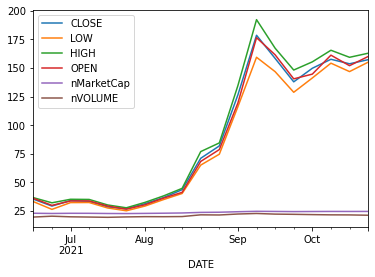

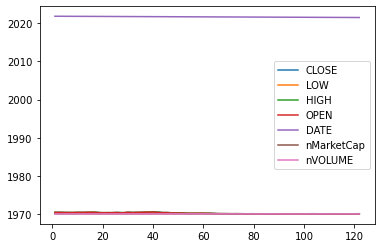

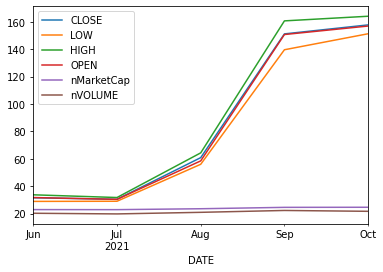

In [832]:
plt.figure(figsize=(10,10))
weekly_df.plot();
df.plot();
monthly_df.plot();


In [833]:
df

,CLOSE,LOW,HIGH,OPEN,DATE,nMarketCap,nVOLUME
1,157.23,155.03,162.86,160.00,2021-10-18,24.578803,21.253234
2,159.74,154.09,167.43,157.46,2021-10-17,24.594290,21.497457
3,157.54,156.74,164.71,163.01,2021-10-16,24.579872,21.149515
4,162.60,146.98,165.12,150.05,2021-10-15,24.611472,22.102180
5,149.76,147.33,155.33,148.02,2021-10-14,24.528827,21.390121
...,...,...,...,...,...,...,...
118,30.05,25.70,32.77,26.91,2021-06-23,22.826479,20.828799
119,26.77,20.38,28.71,26.59,2021-06-22,22.711005,20.953250
120,26.66,25.95,35.50,35.26,2021-06-21,22.706720,20.449282
121,35.32,31.36,35.93,35.24,2021-06-20,22.988160,19.930492


<AxesSubplot:xlabel='DATE'>

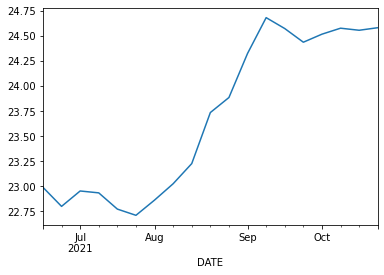

In [834]:
weekly_df['nMarketCap'].plot()

In [835]:
weekly_df['nMarketCap'].size

19

<AxesSubplot:xlabel='DATE'>

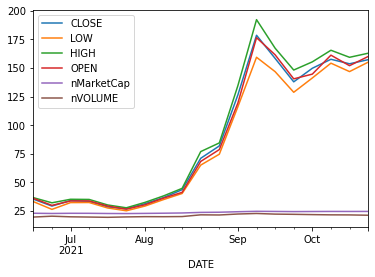

In [836]:
weekly_df.plot()

In [837]:
weekly_df

,CLOSE,LOW,HIGH,OPEN,nMarketCap,nVOLUME
DATE,,,,,,
2021-06-20,35.335000,33.170000,36.640000,36.030000,22.988604,19.662188
2021-06-27,29.285714,26.371429,32.115714,29.877143,22.798656,20.420494
2021-07-04,34.081429,32.300000,35.207143,33.741429,22.952126,19.875457
2021-07-11,33.467143,32.377143,35.062857,33.757143,22.933317,19.665642
2021-07-18,28.505714,27.592857,30.217143,29.291429,22.771665,19.433213
2021-07-25,26.805714,25.148571,27.761429,26.595714,22.709649,19.779657
2021-08-01,31.278571,29.245714,32.470000,30.397143,22.861405,20.015070
2021-08-08,36.694286,34.931429,38.147143,36.225714,23.024316,19.976834
2021-08-15,43.571429,40.260000,44.742857,41.257143,23.225072,20.103577


In [838]:
x= weekly_df.filter(['nMarketCap'],axis=1)
x.drop(x.tail(1).index,inplace=True)
train = x[0:12]
test= x[12:]

In [839]:
test.size

6

In [840]:
x

,nMarketCap
DATE,
2021-06-20,22.988604
2021-06-27,22.798656
2021-07-04,22.952126
2021-07-11,22.933317
2021-07-18,22.771665
2021-07-25,22.709649
2021-08-01,22.861405
2021-08-08,23.024316
2021-08-15,23.225072


In [841]:
x.shape

(18, 1)

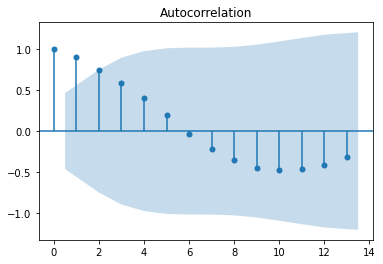

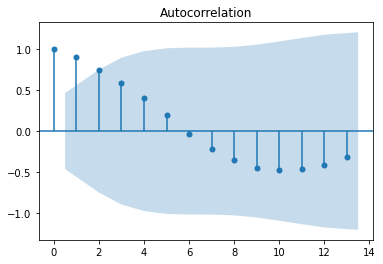

In [842]:
plot_acf(x)

In [843]:
p=q= range(0,7)
d=range(1,3)
pdq= list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 2, 5),
 (2, 2, 6),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 2, 5),
 (3, 2, 6),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 2, 0),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4),
 (4, 2, 5),
 (4, 2, 6),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 2, 0),
 (5, 2, 1),
 (5, 2, 2),
 (5, 2, 3),
 (5, 2, 4),
 (5, 2, 5),
 (5,

In [844]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        arima_model= ARIMA(train, order=param)
        arima_model_fit = arima_model.fit()
        print( param,arima_model_fit.aic)
    except:
        continue

(0, 1, 0) 1.034454568498095
(0, 1, 1) 2.452191599839715
(0, 1, 2) 1.6377112000037002
(0, 1, 3) 2.5608149414368384
(0, 1, 4) 4.9436277197310545
(0, 2, 0) 2.2695834901955134
(0, 2, 1) -2.3243832413030674
(0, 2, 2) -0.7086227840312915
(0, 2, 3) 0.41776440266239945
(1, 1, 0) 1.910492155425942
(1, 2, 0) 0.8958101700660492
(2, 1, 0) 2.355847158987622
(2, 2, 0) 1.1143952517700768
(3, 1, 0) 4.301779727228656
(3, 2, 0) 2.8183783436173755
(4, 1, 0) 5.634756748299985
(4, 2, 0) 37.97138515318035
(5, 1, 0) 48.831155392198866


In [848]:
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        arima_model= ARIMA(train, order=param)
        arima_model_fit = arima_model.fit()
        predictions = arima_model_fit.forecast(steps= 6)[0]
        predictions= pd.Series(predictions)
        print( param,f'AIC score  {arima_model_fit.aic}', f'MAE score  {np.mean(np.abs(test.values-predictions.values))}')
    except:
        continue

(0, 1, 0) AIC score  1.034454568498095 MAE score  0.23715581916827747
(0, 1, 1) AIC score  2.452191599839715 MAE score  0.2829520538793745
(0, 1, 2) AIC score  1.6377112000037002 MAE score  0.42002567978206407
(0, 1, 3) AIC score  2.5608149414368384 MAE score  0.38864783253830854
(0, 1, 4) AIC score  4.9436277197310545 MAE score  0.7145732029701998
(0, 2, 0) AIC score  2.2695834901955134 MAE score  1.8918604413017155
(0, 2, 1) AIC score  -2.3243832413030674 MAE score  1.552793030117795
(0, 2, 2) AIC score  -0.7086227840312915 MAE score  1.52834080853946
(0, 2, 3) AIC score  0.41776440266239945 MAE score  1.5754591563663287
(1, 1, 0) AIC score  1.910492155425942 MAE score  0.3715153909186903
(1, 2, 0) AIC score  0.8958101700660492 MAE score  1.3426637044680199
(2, 1, 0) AIC score  2.355847158987622 MAE score  0.5030365408266051
(2, 2, 0) AIC score  1.1143952517700768 MAE score  1.6139028882551
(3, 1, 0) AIC score  4.301779727228656 MAE score  0.5691860087016045
(3, 2, 0) AIC score  2.81

### After fitting multiple parameters we found out that the best ARIMA model for our data is ARIMA(0,1,0) 
### with AIC score = 1.034454568498095 and MAE score = 0.23715581916827747

In [906]:
arima_model= ARIMA(train, order= (0,1,0))
arima_model_fit = arima_model.fit()

In [907]:
predictions = arima_model_fit.forecast(steps= 6)[0]
predictions= pd.Series(predictions)
predictions.size

6

In [908]:
test

,nMarketCap
DATE,
2021-09-12,24.679078
2021-09-19,24.570436
2021-09-26,24.434312
2021-10-03,24.514379
2021-10-10,24.573918
2021-10-17,24.553381


In [909]:
test_pre1= test.copy()
test_pre1['predictions']= predictions.values
test_pre1
#merge1= pd.merge(x,test_pre1, on = 'DATE' )
#merge1

,nMarketCap,predictions
DATE,,
2021-09-12,24.679078,24.443764
2021-09-19,24.570436,24.565027
2021-09-26,24.434312,24.686290
2021-10-03,24.514379,24.807553
2021-10-10,24.573918,24.928817
2021-10-17,24.553381,25.050080


In [912]:
#Wtest= x.copy()
frames = [train.copy(),test_pre1.copy()]

result = pd.concat(frames)
result

,nMarketCap,predictions
DATE,,
2021-06-20,22.988604,NaN
2021-06-27,22.798656,NaN
2021-07-04,22.952126,NaN
2021-07-11,22.933317,NaN
2021-07-18,22.771665,NaN
2021-07-25,22.709649,NaN
2021-08-01,22.861405,NaN
2021-08-08,23.024316,NaN
2021-08-15,23.225072,NaN


In [921]:
result.iloc[12:, 1]

DATE
2021-09-12    24.443764
2021-09-19    24.565027
2021-09-26    24.686290
2021-10-03    24.807553
2021-10-10    24.928817
2021-10-17    25.050080
Freq: W-SUN, Name: predictions, dtype: float64

([<matplotlib.axis.YTick at 0x2ab796832b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

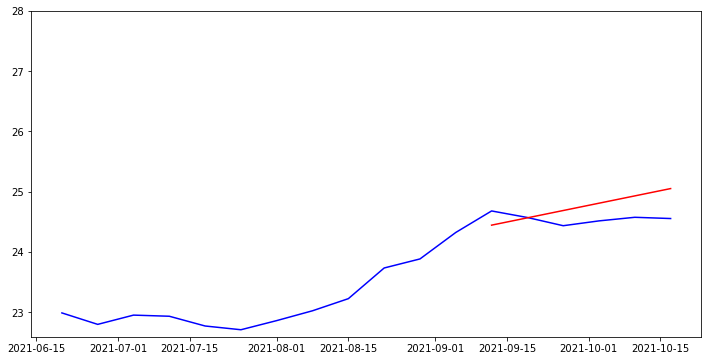

In [927]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(result.nMarketCap, color='blue')
plt.plot(result.iloc[12:, 1], color= 'red')
#(result.iloc[12:, 1]).plot()
#plt.plot(train, color= 'blue')
plt.yticks(range(23,29))



In [900]:
df.to_csv('mycryptocurrancy.csv')